In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Velocity effects on the spectral line shapes 

In this notebook we will, study how the velocity in the atmosphere (that can be constant but also variable with height/optical depth), influences the shape of the spectral line. 

You all are used to the idea that if the object is moving away/towards you, the position of the spectral line will be shifted toward the red or blue. In our approach we would model that by employing a *constant* velocity throughout the atmosphere. 

What about a velocity that is variable throughout the atmosphere? I.e. it is low at the bottom of the atmosphere and increases with height? Well we are here to find out! 

Steps we will take are: 

- Learn how to change and write down the atmosphere in the file (we will only concern ourselves with changing Temperature and velocity)
- Calculate the spectra (we will hop to the terminal for that) 
- Read, visualize and compare spectra! 

Let's go! 

In [17]:
## We start with our familiar commands to be able to use RH tools:

import sys
sys.path.append('/home/milic/codes/RH/python/')

import matplotlib.pyplot as plt
from rhanalyze.rhatmos import input_atmos

In [18]:
# We are going to load the falc atmosphere in an object:
# ONE_D_PLANE is the "reserved" type for the atmosphere

a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos')

In [19]:
print (a.T.shape)

(82,)


In [20]:
# 82 points, just as we expected! 

In [21]:
a.v.shape

(82,)

In [22]:
# 82 points for velocity too, neat!

Let's visualize some stuff just so that we are clear all is well! 

Text(0, 0.5, 'Velocity')

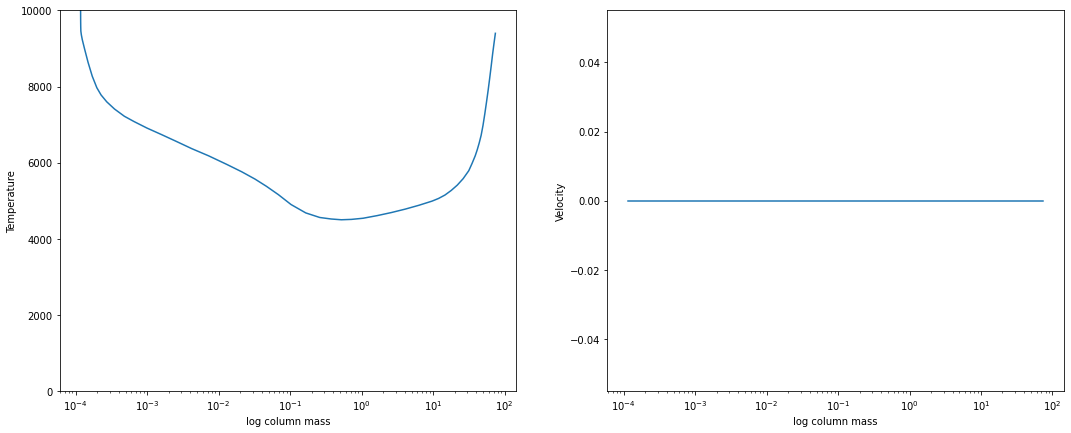

In [23]:
# Don't stress about the log column mass as the x coordinate. We can discuss a little bit
# column mass is in a way "vertical coordinate"

plt.figure(figsize=[18,7])
plt.subplot(121)
plt.semilogx(a.cmass,a.T)
plt.xlabel("log column mass")
plt.ylabel("Temperature")
plt.ylim([0,10000])
plt.subplot(122)
plt.semilogx(a.cmass,a.v)
plt.xlabel("log column mass")
plt.ylabel("Velocity")


In [24]:
# Let's pretend we did something to the atmosphere and save it!
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos')
del(a) # we don't want this object hanging around and making a mess

## Modifying input files for RH. 

### We want to change a little bit what the RH is doing compared to it's default mode. Firstly we want to make sure that the rh is using our newly saved atmosphere (and we will modify it every now and then), as the input one. 

Go to your /RH/rhf1d/run/ directory and edit keyword.input file so that it takes the _temp. atmos as the input, example is in the image below: 


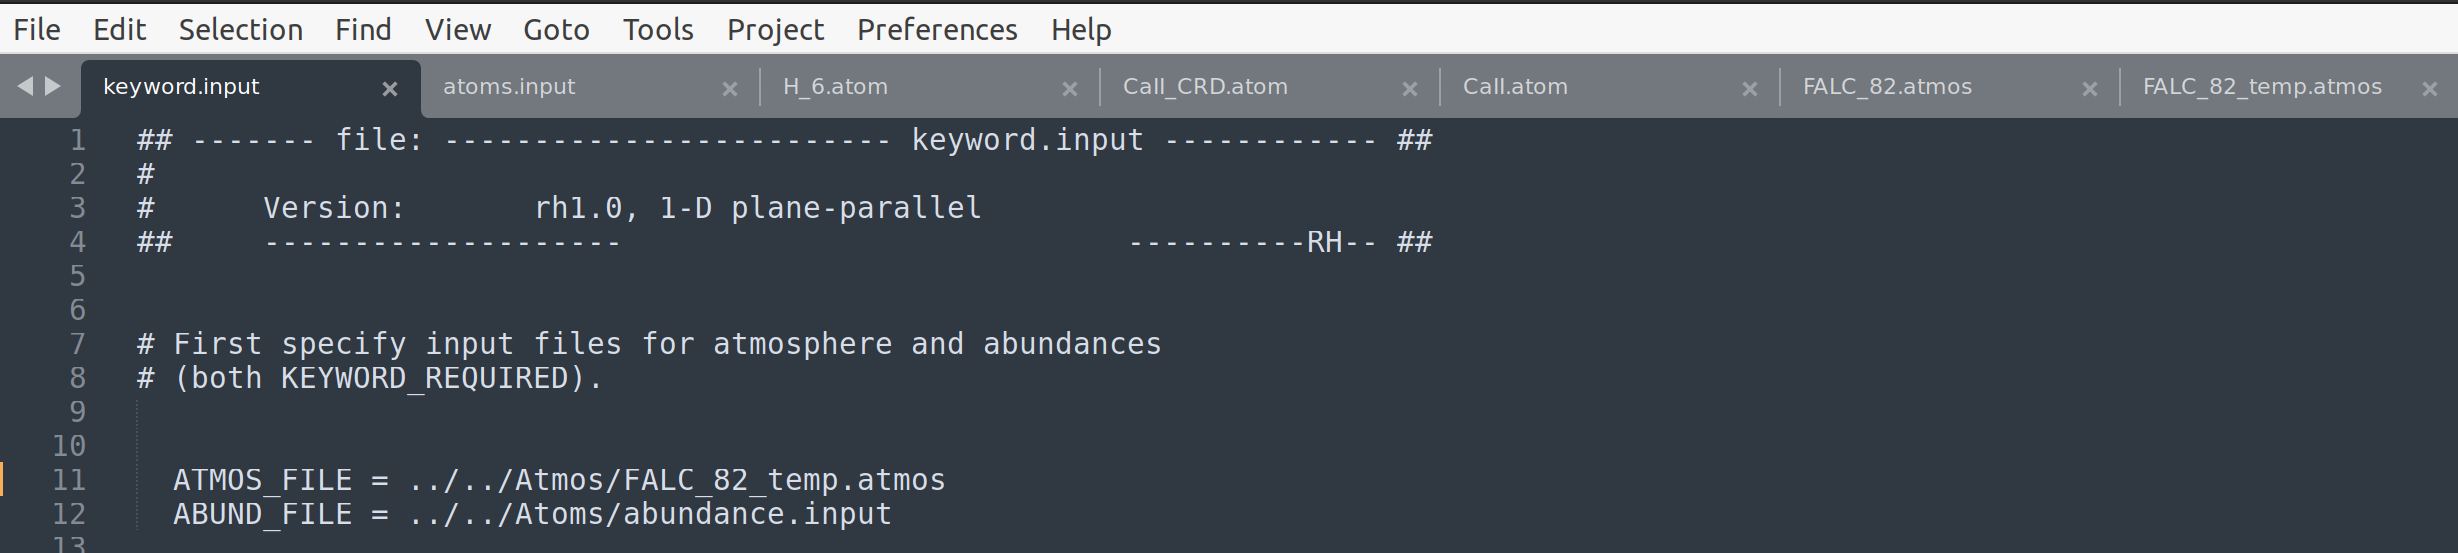

### Then we want to change our Hydrogen atom to "active" so that we get it calculated properly and RH will provide the output spectrum of Hydrogen. 

Open RH/rhf1d/run/atoms.input

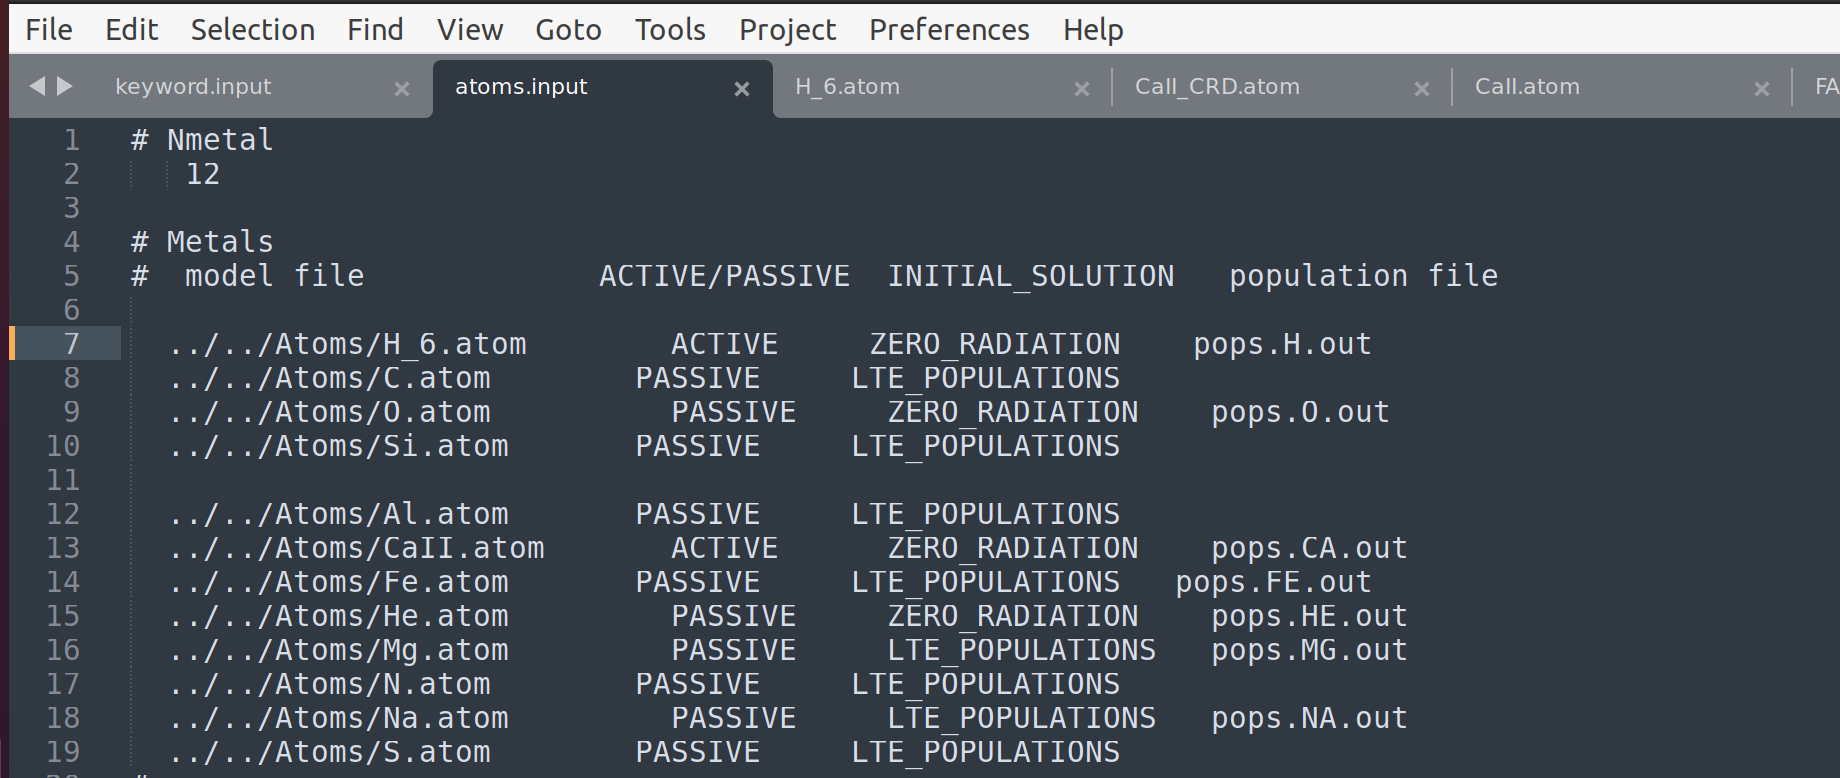

### Now finally let's set-up Hydrogen atom to have a bit more wavelength points so that we can see the spectral line nicely in the output! 

Open /RH/Atoms/H_6.atom and change the line (first line of the Balmer Series), to have Nlambda = 200 and qcore = 25. You should do the same for RH/Atoms/CaII.atom

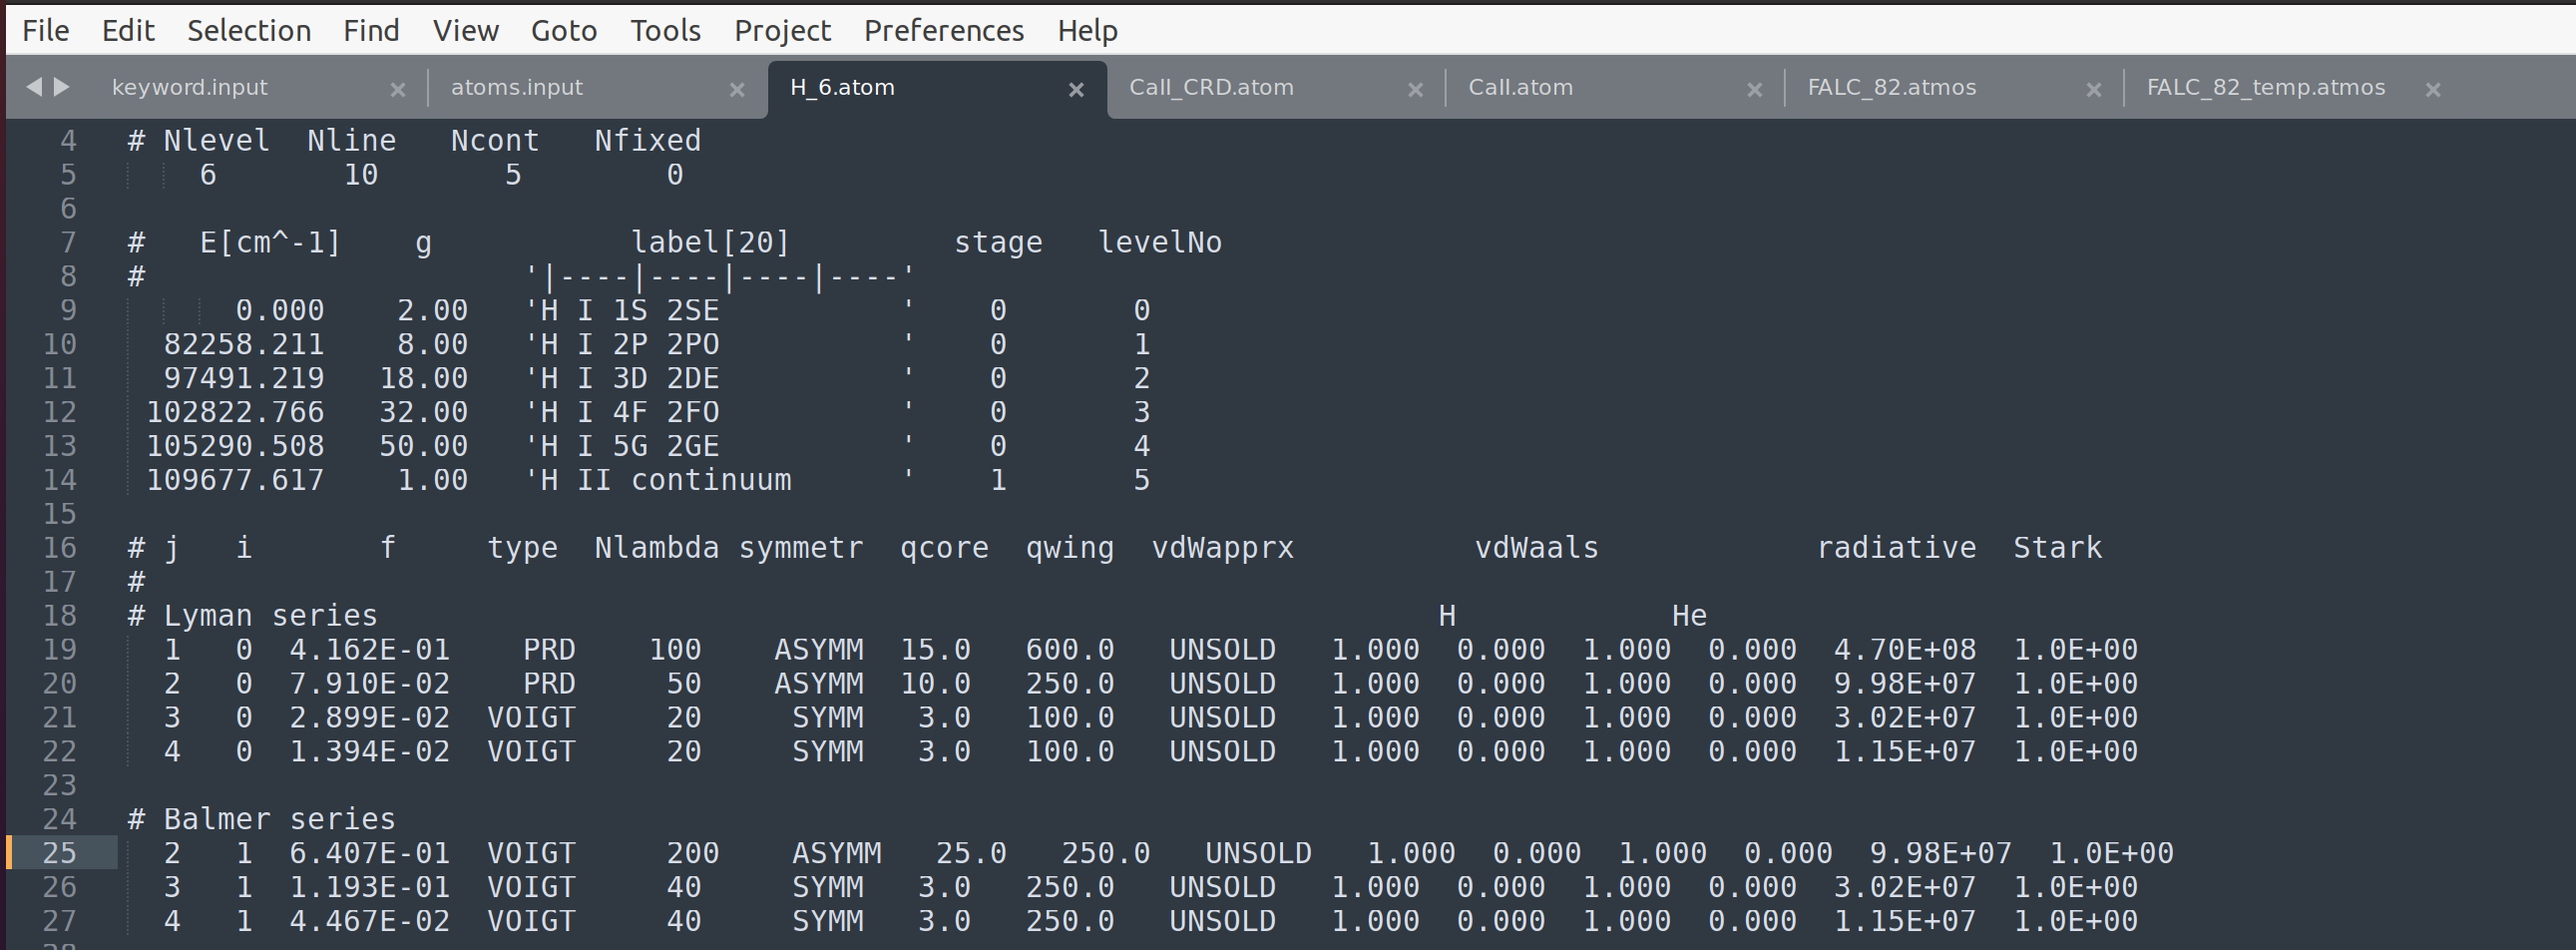

### Now jump to the terminal real quick and run ../rhf1d and ../solveray
.
.
.
.
.

### And now load the spectra and plot it! (Same as we did earlier in notebook with Han, we are just going to make it a bit more streamlined as we are interested in Ca II 8542 and H alpha lines only)

In [29]:
# We are importing this again, just to be sure
import sys
sys.path.append('/home/milic/codes/RH/python/')

import numpy as np
import rhanalyze
from rhanalyze.rhatmos import input_atmos
import matplotlib.pyplot as plt


In [30]:
rhoutput ='/home/milic/codes/RH/rhf1d/run'

In [31]:
falc = rhanalyze.rhout(rhoutput) 
waves0=falc.spectrum.waves 
# We will have to save wavelength grids each time as they are slightly different each time

Text(54.625, 0.5, 'Intensity')

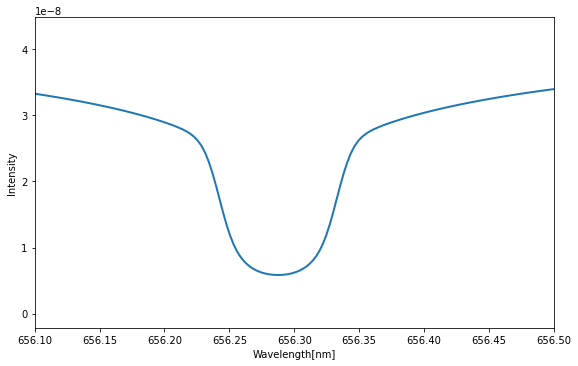

In [32]:
# Now let'slook at the lines.
# Let's start with the most useful line of all, CaII 854.2 nm


I0=np.copy(falc.rays[0].I) # COpying our spectrum for later use
plt.figure(figsize=[8,5])
plt.plot( waves0,I0,linewidth=2.0)
#plt.xlim([854.0,854.4])
plt.xlim([656.1,656.5])
plt.tight_layout()
plt.xlabel("Wavelength[nm]")
plt.ylabel('Intensity')

### Now let's not pretend, but let's change the file, by adding some velocity and repeat all the steps! 

In [33]:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos')
a.v[:] = 5.0 # km/s, RH will convert to SI later
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos')
del(a)

Execute again...

In [34]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves1=falc.spectrum.waves
I1=np.copy(falc.rays[0].I)

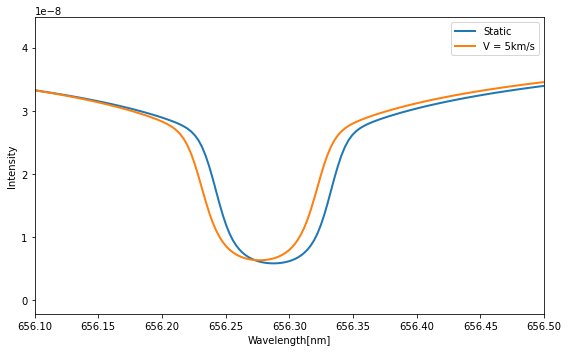

In [37]:
plt.figure(figsize=[8,5])
#plt.plot(waves,I0,linewidth=2.0)
plt.plot(waves0,I0,linewidth=2.0,label='Static')

plt.plot(waves1,I1,linewidth=2.0, label='V = 5km/s')
#plt.plot(Halpha_obs[0],Halpha_obs[1],label='atlas')
#plt.xlim([854.1,854.3])
plt.xlim([656.1,656.5])
plt.tight_layout()
plt.xlabel("Wavelength[nm]")
plt.ylabel('Intensity')
plt.legend()
plt.tight_layout()

## Now, something a bit more complicated, a gradient in the velocity going from 25 km/s at the top, to 0 km/s at the bottom. 

In [38]:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos')
a.v[:] = 25.0 + -25.*np.linspace(0,81,82)/81.0 # km/s, RH will convert to SI later
print (a.v)
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos')
del(a)

[25.         24.69135802 24.38271605 24.07407407 23.7654321  23.45679012
 23.14814815 22.83950617 22.5308642  22.22222222 21.91358025 21.60493827
 21.2962963  20.98765432 20.67901235 20.37037037 20.0617284  19.75308642
 19.44444444 19.13580247 18.82716049 18.51851852 18.20987654 17.90123457
 17.59259259 17.28395062 16.97530864 16.66666667 16.35802469 16.04938272
 15.74074074 15.43209877 15.12345679 14.81481481 14.50617284 14.19753086
 13.88888889 13.58024691 13.27160494 12.96296296 12.65432099 12.34567901
 12.03703704 11.72839506 11.41975309 11.11111111 10.80246914 10.49382716
 10.18518519  9.87654321  9.56790123  9.25925926  8.95061728  8.64197531
  8.33333333  8.02469136  7.71604938  7.40740741  7.09876543  6.79012346
  6.48148148  6.17283951  5.86419753  5.55555556  5.24691358  4.9382716
  4.62962963  4.32098765  4.01234568  3.7037037   3.39506173  3.08641975
  2.77777778  2.4691358   2.16049383  1.85185185  1.54320988  1.2345679
  0.92592593  0.61728395  0.30864198  0.        ]


## Execute again...

In [41]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves2=falc.spectrum.waves
I2=np.copy(falc.rays[0].I)

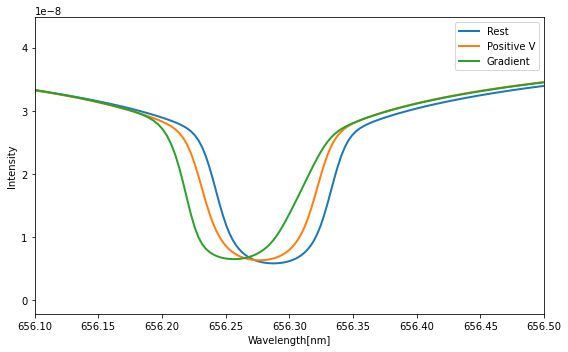

In [42]:
plt.figure(figsize=[8,5])
plt.plot(waves0,I0,linewidth=2.0,label='Rest')
plt.plot(waves1,I1,linewidth=2.0,label='Positive V')
plt.plot(waves2,I2,linewidth=2.0,label='Gradient')
#plt.xlim([854.1,854.3])
#plt.xlim([393.1,393.5])
plt.xlim([656.1,656.5])
plt.tight_layout()
plt.xlabel("Wavelength[nm]")
plt.ylabel('Intensity')
plt.legend()
plt.tight_layout()

### What can you conclude when comparing these three? 

List some of your conclusions below and discuss. 

.

.

.

.

.

.

.


## Now what happens in real life...
#### Is that we only have the spectra, not the atmospheres. How could we infer the velocities from the spectra? 

#### The easiest would be to infer the position of the line center, i.e. the "minimum" of the line. How do we do that? 

Naively, you could just take the wavelength in the array where the intensity is minimal. However, to be more precise we are going to find the preliminary center (point with minimum intensity), and then fit a parabola around it to get sub-pixel precision. Let's try it out on the center of the line! 

In [43]:
# Finding the minimum of the line. Keep in mind we need the wavelength around H alpha line
halpha_region = np.where((waves0>656.1) & (waves0<656.5))
halpha_region = np.asarray(halpha_region)[0]
indmin = np.argmin(I0[halpha_region]) + halpha_region[0] #Index of the point with minimum intensity around H alpha line
print (indmin) # test if that makes sense

# We will subtract the percieved mean wavelength. This is to improve numerical stability of the fit
x = waves0[indmin-10:indmin+11]-np.mean(waves0[indmin-10:indmin+11]) 
y = I0[indmin-10:indmin+11]

# Fit a parabola (polynomial of degree 2, through a couple of points each side of( center)
p = np.polyfit(x,y,2)
print (p)
# Location of the minimum is -b/2a where y = ax^2 + bx + c
ll_center = -p[1]/2/p[0] + np.mean(waves0[indmin-10:indmin+11])
print (ll_center)

562
[2.80417064e-06 7.92879896e-16 5.80480730e-09]
656.287556678073


In [44]:
# We can take this as our "default" center wavelength! Let's call it halpha_0
halpha_0 = ll_center

In [45]:
# Let's pack the cell above into a function:
def calc_line_center(spectrum,wavelength):
    halpha_region = np.where((wavelength>656.1) & (wavelength<656.5))
    halpha_region = np.asarray(halpha_region)[0]
    indmin = np.argmin(spectrum[halpha_region]) + halpha_region[0] #Index of the point with minimum intensity around H alpha line
    # We will subtract the percieved mean wavelength. This is to improve numerical stability of the fit
    x = wavelength[indmin-10:indmin+11]-np.mean(wavelength[indmin-10:indmin+11]) 
    y = spectrum[indmin-10:indmin+11]

    # Fit a parabola (polynomial of degree 2, through a couple of points each side of( center)
    p = np.polyfit(x,y,2)
    # Location of the minimum is -b/2a where y = ax^2 + bx + c
    ll_center = -p[1]/2/p[0] + np.mean(wavelength[indmin-10:indmin+11])
    return ll_center
    

In [46]:
# Let's test it on the second profile
c = 2.997E5
halpha_center_1 = calc_line_center(I1,waves1)
print (halpha_center_1)
# And the velocity
v_1 = (halpha_center_1-halpha_0)/halpha_0 *c 
print('Velocity of the spectrum #1 with respect to the static atmosphere is: ',v_1)

656.2767859797337
Velocity of the spectrum #1 with respect to the static atmosphere is:  -4.918542580033039


### Almost exactly 5km/s!!! Note the sign difference that we know is because RH uses geometrical velocity (positive is up), and we like to use the spectroscopic velocity (positive is down). 


#### What would happen if you used this method on the profile calculated with the velocity gradient?



In [47]:
halpha_center_2 = calc_line_center(I2,waves2)
print (halpha_center_2)
# And the velocity
v_2 = (halpha_center_2-halpha_0)/halpha_0 *c 
print('Velocity of the spectrum #2 with respect to the static atmosphere is: ',v_2)

656.2578285475113
Velocity of the spectrum #2 with respect to the static atmosphere is:  -13.57563561685794


37


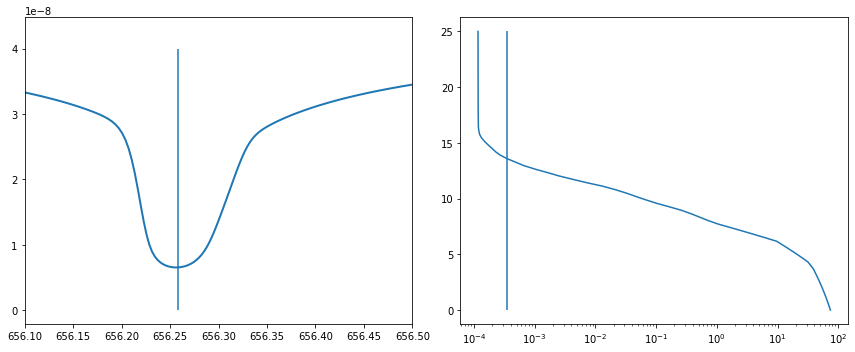

In [48]:
# Let's see what does the code 'think' is the center position of the line 
# and to which point in the atmosphere it corresponds?
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82_temp.atmos')
i_v_closest = np.argmin(np.abs(a.v+v_2))
print (i_v_closest)

plt.figure(figsize=[12,5])
plt.subplot(121)
plt.plot(waves2,I2,linewidth=2.0)
plt.xlim([656.1,656.5])
plt.vlines(halpha_center_2,0,4E-8)
plt.subplot(122)
plt.semilogx(a.cmass,a.v)
plt.vlines((a.cmass[i_v_closest]),0,25)
plt.tight_layout()

### We will learn 'something' from the position of the minimum of the spectral line in this case. But we cannot really say that the pixel we are looking at is moving with velocity ~ 13km/s toward us. We already see from the shape of the line that thre is a gradient of the velocity. 

#### To try to characterize this, let's make something called a bisector. It is a curve that tracks the velocity of a certain "intensity level". That is, for each intensity (that might correspond to each "depth"), we will find the line that connects both sides of that intensity, and then the center of that line will give us some representative velocity of that intensity level.

#### Here is an example: Red line connects midpoints of the straight lines at pre-determined intensity levels. We can see the velocity is more blue as we go toward the core of the line. This means the velocity is decreasing with height (the parts of the spectral line closer to core are probing higher layers). Decreasing in this sense is in a literal way: going from positive to less positive to negative. I.e. decreasing in value not in the absolute value.

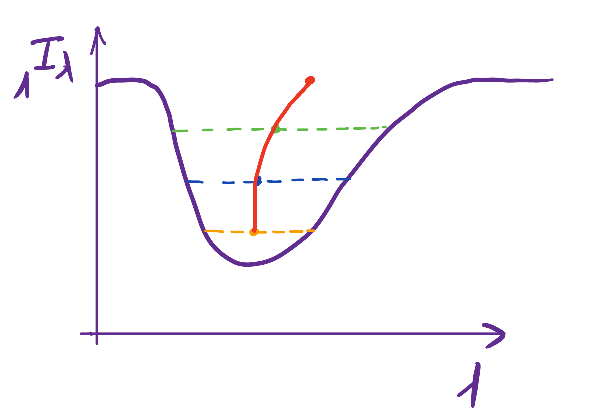

In [62]:
# Let's calcualte

def calc_bisectors(spectrum,wavelength,levels,offset):
    # this is the function that takes in the spectrum, wavelength and desired bisector levels
    # and returns the position of both left & right points on the horizontal line that "cuts"
    # the profile at those levels.
    # Note: the levels are in fraction of the "Delta" between the line core and a position in the wings 
    # identified by the value "offset" = ~ 1 Ang for Halpha; 0.4-0.5 Ang for CaII 

    from scipy.interpolate import interp1d


    line_core = calc_line_center(spectrum,wavelength)
    l_left = line_core - offset
    l_right = line_core + offset
    f = interp1d(wavelength,spectrum)
    I_left = f(l_left)
    I_right = f(l_right)
    
    I_mean = 0.5*(I_left+I_right)
    I_min = f(line_core)
    Delta= I_mean - I_min

    I_level = np.zeros(len(levels))
    for jj in range (0,len(levels)):
        I_level[jj] = I_min+Delta*levels[jj]

    left_position = np.zeros(len(levels))
    right_position = np.zeros(len(levels))

    local_min = np.argmin(np.abs(wavelength-line_core))
    
    f = interp1d(spectrum[:local_min],wavelength[:local_min])
    for jj in range (0,len(levels)):
        left_position[jj] = f(I_level[jj])

    f = interp1d(spectrum[local_min:],wavelength[local_min:])
    for jj in range (0,len(levels)):
        right_position [jj] = f(I_level[jj])


    return left_position, right_position, I_level

In [65]:
# Now let's calculate the bisectors of the assymetric halpha line. The code was written
# to work on a chunk of spectrum so we will first have to cut it out:

halpha_region = np.where((waves2>656.1) & (waves2<656.5))
halpha_region = np.asarray(halpha_region)[0]
halpha_spectrum = I2[halpha_region]
halpha_wvl = waves2[halpha_region]

levels = np.asarray([0.9,0.7,0.5,0.3,0.1])

test = calc_bisectors(halpha_spectrum,halpha_wvl,levels,0.11) 
# Last one is the "critical wavelength in nm

In [68]:
bisectors = (test[1]+test[0])*0.5

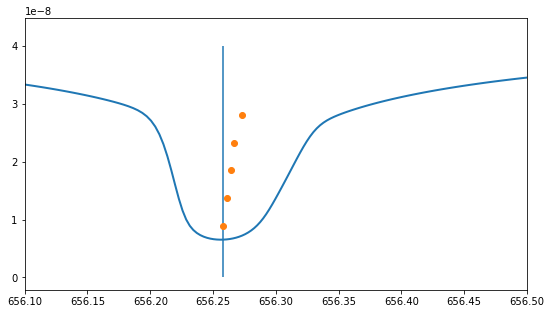

In [70]:
# Let's plot bisectors and see if they make sense:
plt.figure(figsize=[9,5])
plt.plot(waves2,I2,linewidth=2.0)
plt.xlim([656.1,656.5])
plt.vlines(halpha_center_2,0,4E-8)
plt.plot(bisectors,test[2],'o')

#### "Higher" points are more red, (actually in this case less blue) shifted. Does this make sense? 

Discuss this and try to remember this later when we investigate halpha bisectors from observations! 

## Perturbing temperature

For the end, a little experiment: We can also use this notebook to perturb temperature! 

Let's load a model, perturb a temperature with a little bump and then see what happens! 

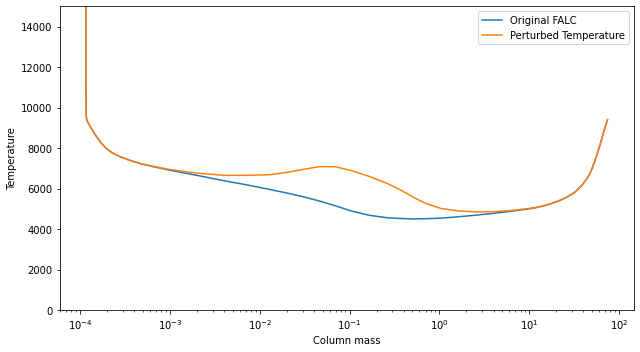

In [103]:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos')
T_old = np.copy(a.T)

# Make a Gaussian jump around point #50, with the widht equal to 5 points, and then see how it influences the line shape 
index = np.linspace(0,81,82)
center = 50
width = 5
jump = np.exp(-(index-center)**2.0/width**2.0)*2000.0
a.T += jump

plt.figure(figsize=[9,5])
plt.semilogx(a.cmass,T_old,label='Original FALC')
plt.semilogx(a.cmass,a.T,label='Perturbed Temperature')
plt.xlabel("Column mass")
plt.ylabel("Temperature")
plt.ylim([0,15000])
plt.legend()
plt.tight_layout()

a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos')
del(a)

### Now run the code again and test the output! 

In [104]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves3=falc.spectrum.waves
I3=np.copy(falc.rays[0].I)

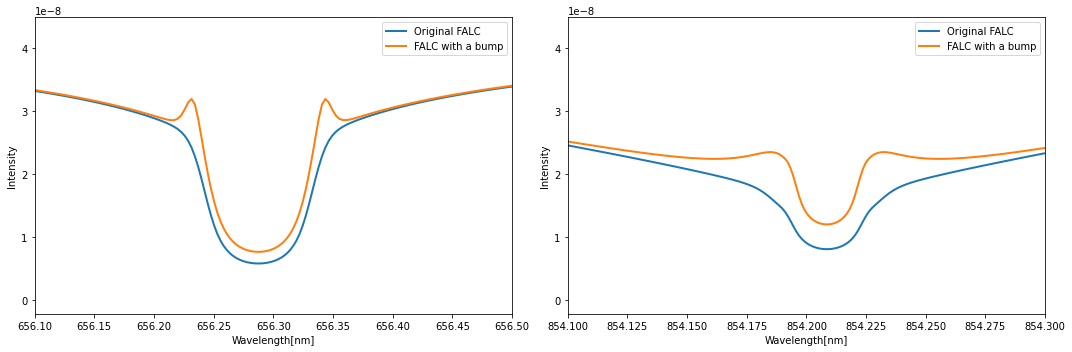

In [105]:
# Comparing old and new Intensities:

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(waves0,I0,linewidth=2.0,label='Original FALC')
plt.plot(waves3,I3,linewidth=2.0, label='FALC with a bump')
plt.xlim([656.1,656.5])
plt.tight_layout()
plt.xlabel("Wavelength[nm]")
plt.ylabel('Intensity')
plt.legend()
plt.subplot(122)
plt.plot(waves0,I0,linewidth=2.0,label='Original FALC')
plt.plot(waves3,I3,linewidth=2.0, label='FALC with a bump')
plt.xlim([854.1,854.3])
plt.tight_layout()
plt.xlabel("Wavelength[nm]")
plt.ylabel('Intensity')
plt.legend()

plt.tight_layout()

### What can you conclude here? 

- What does the fact that Ca II changes more than Halpha tell you? 
- Can temperature bump make a line assymetric? 
- What are the differences between the temperature and velocity perturbations and how do these influence line shape? 